In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1: 데이터 로드

In [2]:
# target : Balance
df = pd.read_csv("./data/credit.csv")
df.head()

# Income : 소득
# Limit : 한도
# Rating : 비율
# Ethnicity : 인종 : Caucasian : 백인

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
df.shape

(400, 12)

In [4]:
df.info()
# 결측치 없음을 확인, Dtype object 타입 변경 필요 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [5]:
# summary
# 회귀분석 : 단순선형, 다중
# 다중회귀 : feature selection : 산점도, 상관계수, VIF
# sklearn, statsmodels
# mae, mse

## 2: 데이터 전처리

In [6]:
# 수치형 데이터만 필터링

In [7]:
df.dtypes

ID             int64
Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [47]:
numerical_columns = [column for column in df.columns if df[column].dtypes in ("int64", "float64")]
numerical_columns

['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']

In [45]:
# 불필요하다고 생각하는 컬럼 제거 : ID
filtered_df = df[numerical_columns].drop(columns=["ID"])
filtered_df.tail(2)

,Income,Limit,Rating,Cards,Age,Education,Balance
398,37.728,2525,192,1,44,13,0
399,18.701,5524,415,5,64,7,966


In [10]:
# feature, target 데이터 분리

In [11]:
features = filtered_df[filtered_df.columns[:-1]]
features.tail(1)

,Income,Limit,Rating,Cards,Age,Education
399,18.701,5524,415,5,64,7


In [12]:
target = filtered_df["Balance"] # target value
target[:2]

0    333
1    903
Name: Balance, dtype: int64

## 3: 모델 학습

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(features, target)

LinearRegression()

## 4. 모델 성능확인

In [15]:
from sklearn.metrics import mean_absolute_error

In [16]:
pred = model.predict(features)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

119.3

## 5: 모델 feature 최적화
- 다중공선성(Multicollinearity) 확인 후 최적 feature로 모델링

In [17]:
# 1. 상관계수 확인

In [18]:
filtered_df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


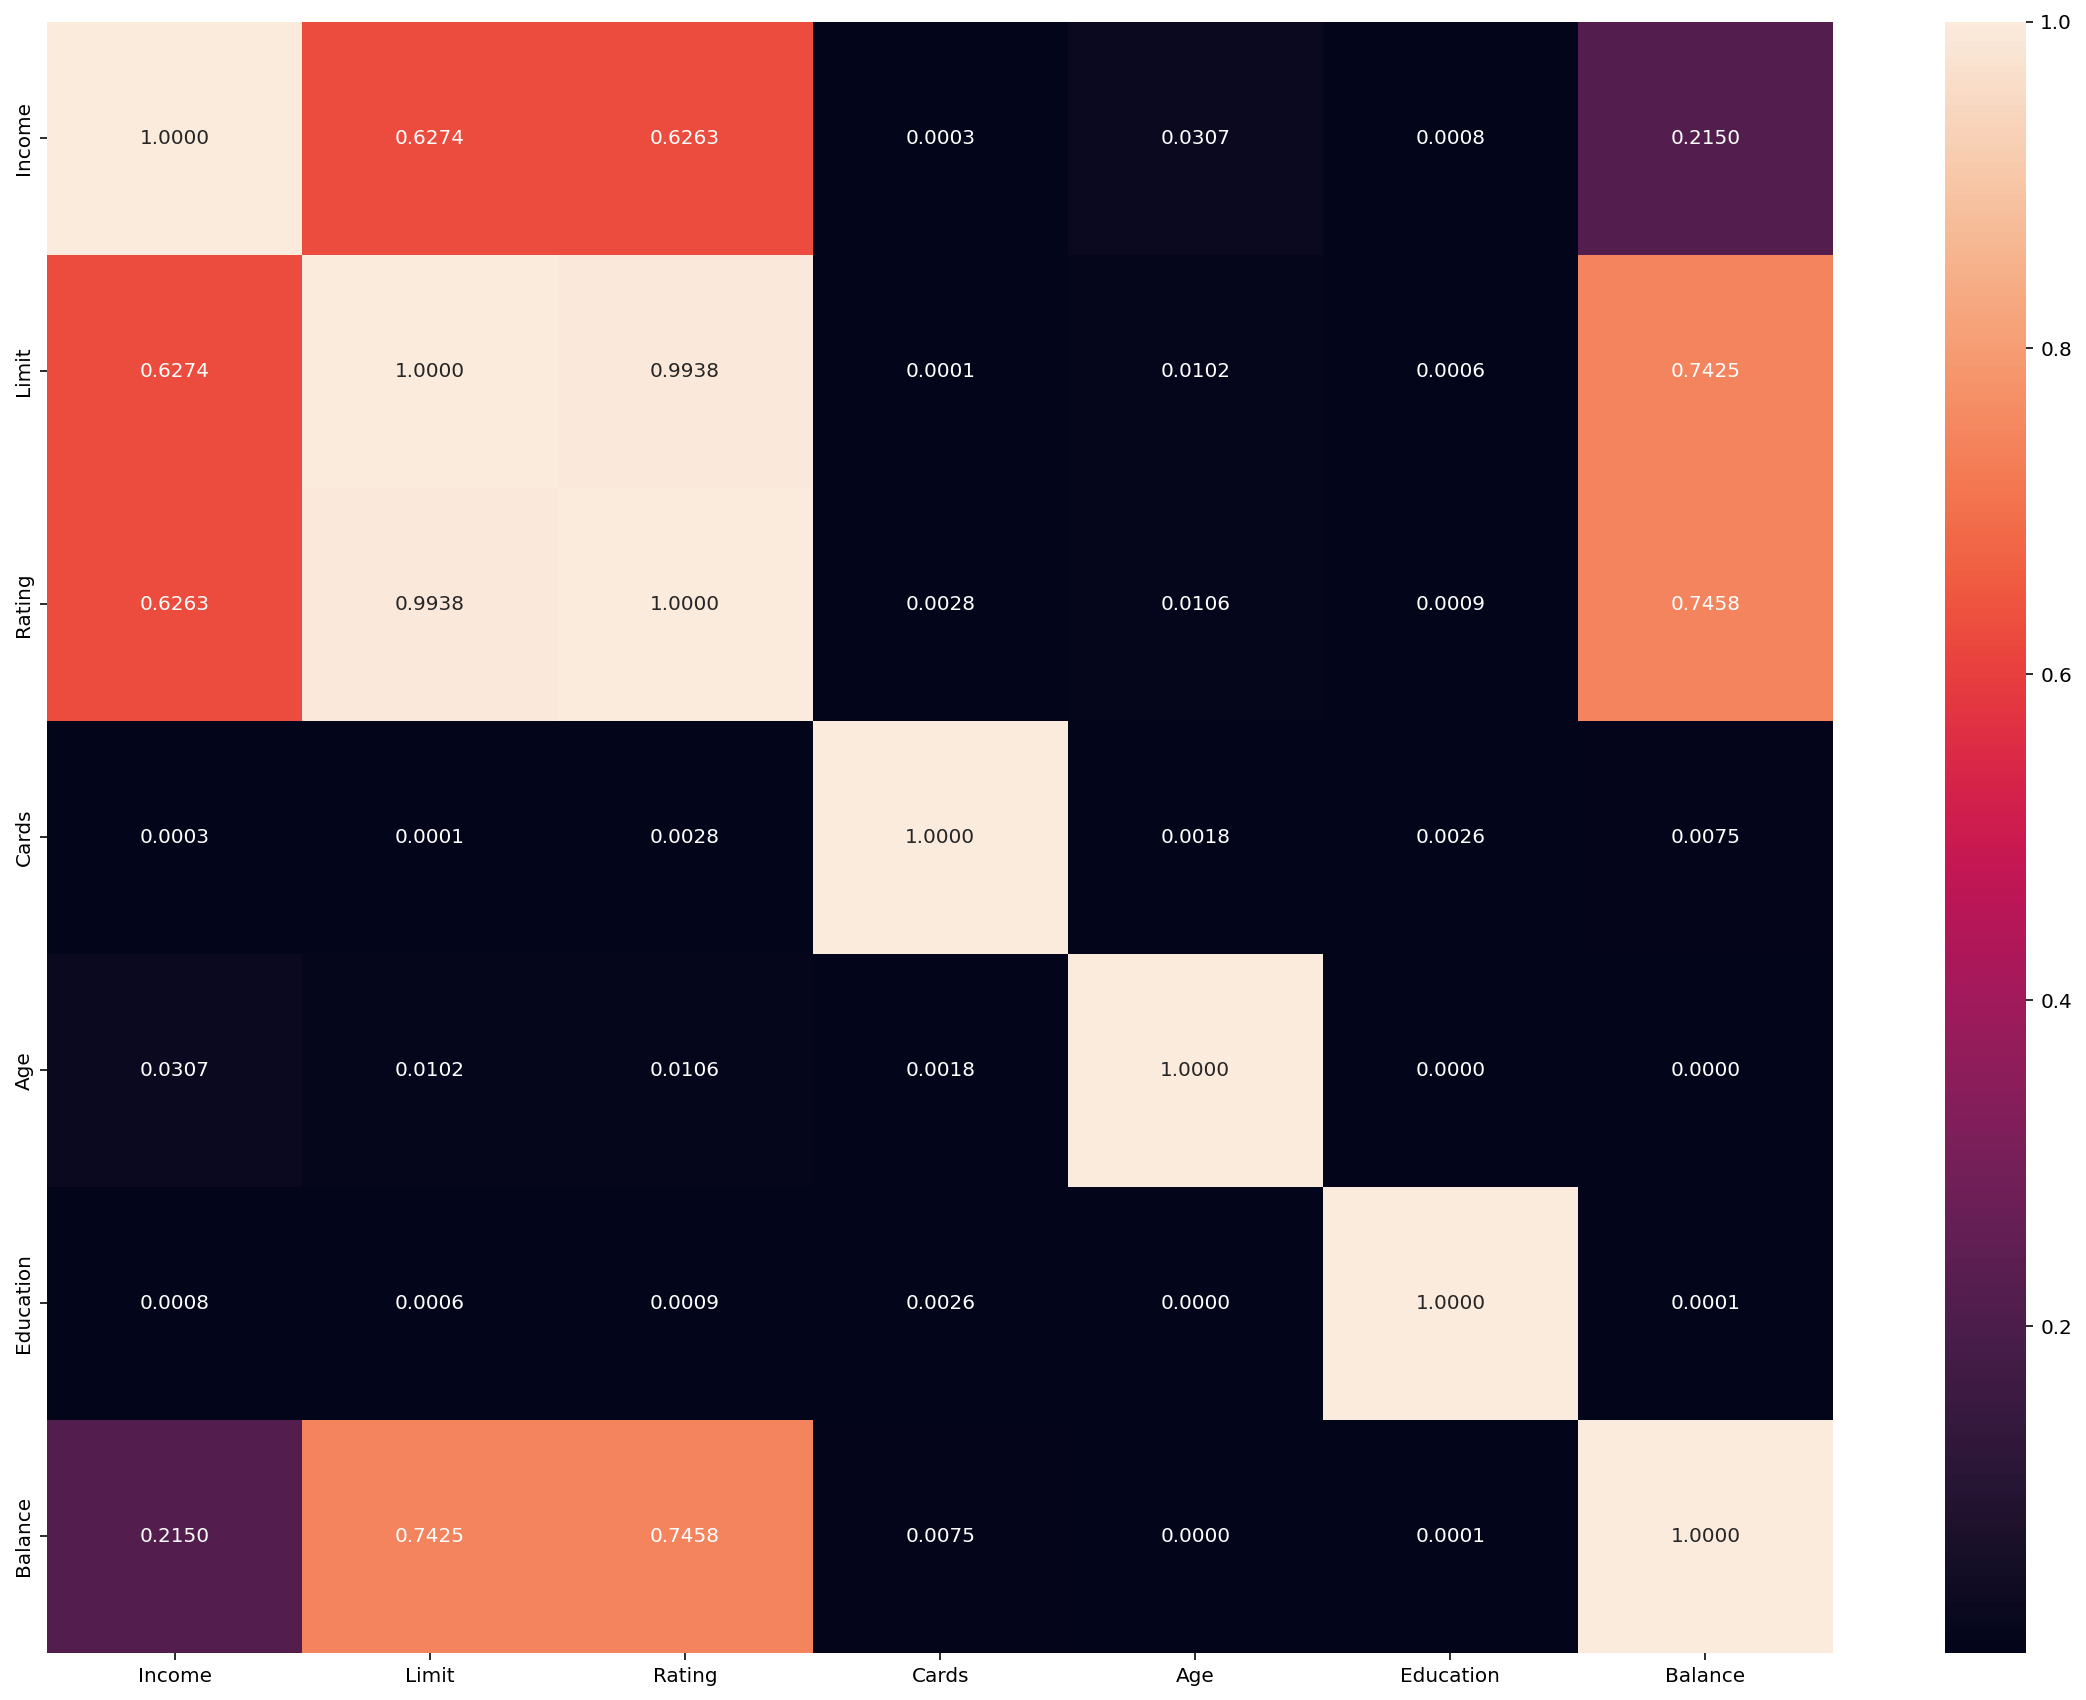

In [19]:
plt.figure(figsize=(20, 15))
sns.heatmap( filtered_df.corr() ** 2, annot=True, fmt=".4f")
plt.show()

In [20]:
# Balance와 관계가 없는 컬럼 Cards, Age, Education 확인

In [21]:
features.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'], dtype='object')

In [40]:
features.columns[:-3]

Index(['Income', 'Limit', 'Rating'], dtype='object')

In [41]:
features_2 = features[features.columns[:-3]]
features_2.tail(2)

,Income,Limit,Rating
398,37.728,2525,192
399,18.701,5524,415


In [42]:
model = LinearRegression().fit(features_2, target)
pred = model.predict(features_2)
mae = np.round(mean_absolute_error(target, pred), 2)
mae
# all feature의 mae 값과 차이가 거의 없음

120.44

In [25]:
# Cards, Age, Education 3개의 컬럼을 제거해도 성능에 큰 변화가 없음 

In [26]:
# 2. 요약표 확인

In [27]:
import statsmodels.api as sm

In [28]:
# features 로 확인하면 Education 컬럼의 p-value가 높게 나와서 Education 컬럼 제거하는것이 좋음
sm_feature = sm.add_constant(features_2)

In [29]:
model = sm.OLS(target, sm_feature).fit()

In [30]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.875    
Dependent Variable: Balance          AIC:                5210.9503
Date:               2022-05-26 09:53 BIC:                5226.9161
No. Observations:   400              Log-Likelihood:     -2601.5  
Df Model:           3                F-statistic:        934.6    
Df Residuals:       396              Prob (F-statistic): 3.20e-179
R-squared:          0.876            Scale:              26359.   
-------------------------------------------------------------------
          Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const   -489.7275   32.0989  -15.2568  0.0000  -552.8331  -426.6219
Income    -7.7193    0.3781  -20.4184  0.0000    -8.4626    -6.9761
Limit      0.0847    0.0447    1.8939  0.0590    -0.0032     0.1726
Rating     2.6986    0.6659    4.0523  0.0001     1.3894     4.0078
------

In [31]:
# MAE 확인
pred =  np.dot(sm_feature, model.params) # feature, parameter 행렬곱 -> 예측값
mae = np.round(mean_absolute_error(target, pred), 2)
mae

120.44

In [32]:
# 3. VIF 지표 확인

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
pd.DataFrame({
    "feature": features_2.columns,
    "VIF": [variance_inflation_factor(features_2.values, idx)
            for idx in range(features_2.shape[1])]
})

,feature,VIF
0,Income,6.913744
1,Limit,378.629519
2,Rating,357.000572


In [35]:
# Limit 제거
features_3 = features_2.drop(columns=["Limit"])
features_3.tail(2)

,Income,Rating
398,37.728,192
399,18.701,415


In [36]:
pd.DataFrame({
    "feature": features_3.columns,
    "VIF": [variance_inflation_factor(features_3.values, idx)
            for idx in range(features_3.shape[1])]
})

,feature,VIF
0,Income,6.325112
1,Rating,6.325112


In [37]:
# 요약표 확인
sm_feature = sm.add_constant(features_3)
model = sm.OLS(target, sm_feature).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.874    
Dependent Variable: Balance          AIC:                5212.5571
Date:               2022-05-26 09:53 BIC:                5224.5315
No. Observations:   400              Log-Likelihood:     -2603.3  
Df Model:           2                F-statistic:        1391.    
Df Residuals:       397              Prob (F-statistic): 4.52e-180
R-squared:          0.875            Scale:              26530.   
-------------------------------------------------------------------
          Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const   -534.8122   21.6027  -24.7567  0.0000  -577.2821  -492.3422
Income    -7.6721    0.3785  -20.2718  0.0000    -8.4162    -6.9281
Rating     3.9493    0.0862   45.8103  0.0000     3.7798     4.1187
------------------------------------------------------------------
Omnibus

In [38]:
# MAE 확인
pred =  np.dot(sm_feature, model.params)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

120.8

In [39]:
# R-squared의 변화가 거의 없음
# mae : 120.44 > 120.8 거의 변화 없음
# 결론 Income, Rating 컬럼만 사용해서 모델을 만드는것이 가장 좋음